In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn


  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - ---------------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from datetime import datetime


In [4]:
import pandas as pd

# Define file paths (Modify if your files are in a different location)
customers_path = r"C:/Users/ankic/Downloads/customers.csv"
sales_data_path = r"C:/Users/ankic/Downloads/sales_data.csv"
orders_path = r"C:/Users/ankic/Downloads/orders.csv"

# Load CSV files
customers = pd.read_csv(customers_path)
sales_data = pd.read_csv(sales_data_path)
orders = pd.read_csv(orders_path)

# Display first few rows of each dataset
print("Customers Data:\n", customers.head(), "\n")
print("Sales Data:\n", sales_data.head(), "\n")
print("Orders Data:\n", orders.head(), "\n")


Customers Data:
    customer_id  total_spend  num_orders last_order_date
0         1001  8072.510788          14      2023-05-28
1         1002  4295.331083          39      2023-09-06
2         1003  9527.625896          10      2023-05-10
3         1004  4760.739090          46      2023-03-06
4         1005  6070.383831          45      2023-06-24 

Sales Data:
    order_id product_name category  order_date     revenue   region
0         1      Chicken     Meat  2023-12-05  443.177076     West
1         2         Eggs    Dairy  2023-09-30  263.980108  Central
2         3   Vegetables     Meat  2023-03-03   57.065403    South
3         4       Fruits    Dairy  2023-02-01  137.527289     East
4         5         Eggs   Bakery  2023-07-20  290.176776    South 

Orders Data:
    order_id  customer_id  order_date           city  total_amount
0         1         1102  2023-10-19        Houston     95.433959
1         2         1045  2023-03-10        Chicago    380.831884
2         3     

In [5]:
customers["last_order_date"] = pd.to_datetime(customers["last_order_date"])
sales_data["order_date"] = pd.to_datetime(sales_data["order_date"])
orders["order_date"] = pd.to_datetime(orders["order_date"])


In [6]:
customers.fillna(0, inplace=True)
sales_data.fillna(0, inplace=True)
orders.fillna(0, inplace=True)


In [7]:
# Select features for clustering
X = customers[['total_spend', 'num_orders']]

# Normalize data (optional, for better clustering)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customers['segment'] = kmeans.fit_predict(X_scaled)

# Map clusters to meaningful names
segment_map = {0: "Occasional Buyer", 1: "Frequent Buyer", 2: "High-Value Buyer"}
customers['segment'] = customers['segment'].map(segment_map)

# View segmented customers
print(customers.head())


   customer_id  total_spend  num_orders last_order_date           segment
0         1001  8072.510788          14      2023-05-28  High-Value Buyer
1         1002  4295.331083          39      2023-09-06  Occasional Buyer
2         1003  9527.625896          10      2023-05-10  High-Value Buyer
3         1004  4760.739090          46      2023-03-06  Occasional Buyer
4         1005  6070.383831          45      2023-06-24  Occasional Buyer


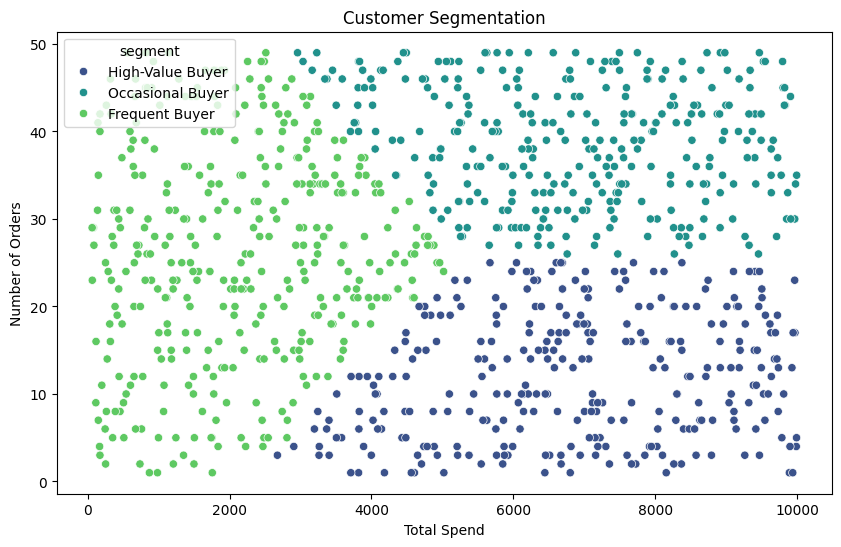

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customers, x='total_spend', y='num_orders', hue='segment', palette='viridis')
plt.title("Customer Segmentation")
plt.xlabel("Total Spend")
plt.ylabel("Number of Orders")
plt.show()


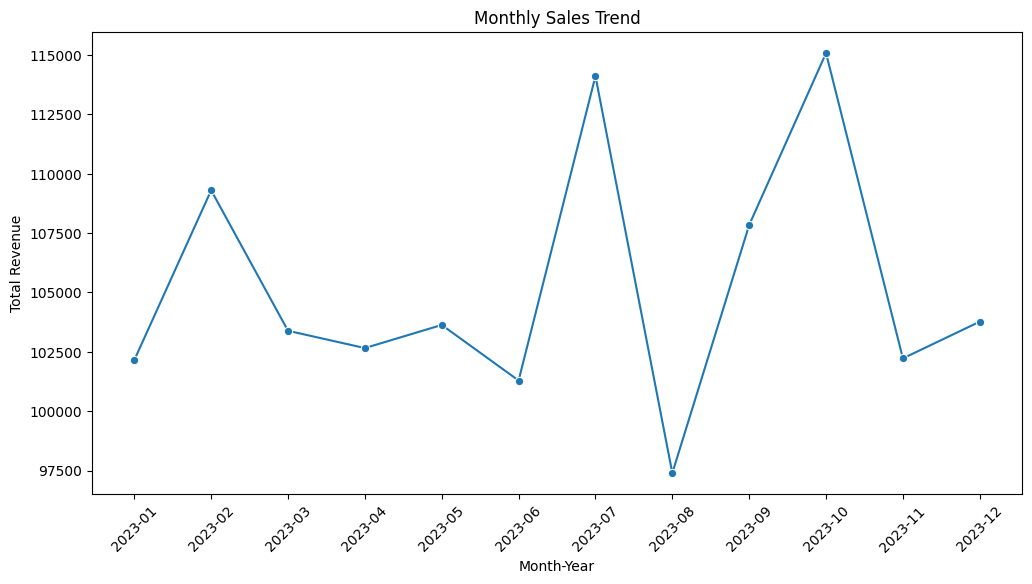

In [9]:
# Extract Month and Year from order_date
sales_data['month_year'] = sales_data['order_date'].dt.to_period('M')

# Group by month to get total revenue
monthly_sales = sales_data.groupby('month_year')['revenue'].sum().reset_index()

# Convert month_year to datetime
monthly_sales['month_year'] = monthly_sales['month_year'].astype(str)

# Plot sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='month_year', y='revenue', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month-Year")
plt.ylabel("Total Revenue")
plt.show()


C:\Users\ankic\AppData\Local\Temp\ipykernel_17064\1287429152.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_orders, x='day_of_week', y='order_id', palette='coolwarm')


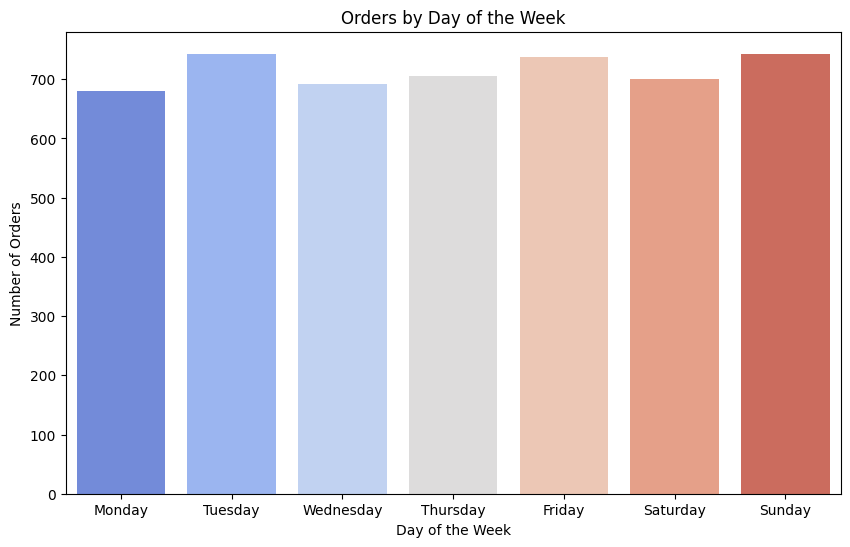

In [10]:
# Extract day of the week from order_date
sales_data['day_of_week'] = sales_data['order_date'].dt.day_name()

# Group by day of the week
daily_orders = sales_data.groupby('day_of_week')['order_id'].count().reset_index()

# Sort by day order
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_orders['day_of_week'] = pd.Categorical(daily_orders['day_of_week'], categories=day_order, ordered=True)

# Plot daily order trend
plt.figure(figsize=(10, 6))
sns.barplot(data=daily_orders, x='day_of_week', y='order_id', palette='coolwarm')
plt.title("Orders by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")
plt.show()


In [11]:
customers.to_csv("segmented_customers.csv", index=False)
monthly_sales.to_csv("sales_trends.csv", index=False)
